In [1]:
import numpy as np
from matplotlib import pyplot as plt

nt = 100
nxy = 100
n_samples = 10000
D = 0.1
cell_num = 20
dt = 0.1
tau = 200
phi_av = 0.5

x_space = np.linspace(-1,1,nxy)
y_space = np.linspace(-1,1,nxy)

cells_x = np.linspace(-1,1,cell_num)        
diff = np.diff(cells_x)[0]

sum_phi = np.zeros((cells_x.size,cells_x.size,nt))
count = np.zeros((cells_x.size,cells_x.size,nt))

def step(x,y,phi):
    x += np.sqrt(2*D)*np.random.normal()*np.sqrt(dt)
    y += np.sqrt(2*D)*np.random.normal()*np.sqrt(dt)
    phi = (phi_av + phi*(dt*tau-1))/(dt*tau)

    condition = False
    if x > 1:
        condition = True
    elif x < -1:
        condition = True

    if y > 1:
        condition = True
    elif y < -1:
        condition = True

    return x,y,phi,condition

    
phi_vec = []
particles = []

for i in range(n_samples):
    x_0 = np.random.choice(x_space)
    y_0 = np.random.choice(y_space)
    x_t = x_0
    y_t = y_0
    condition = False
    if x_0 < 0:
        phi_0 = 0
    else:
        phi_0 = 1
    phi_t = phi_0
    
    x_y_phi_t = []

    for j in range(nt):
        x_y_phi_t.append([x_t,y_t,phi_t])
        if not condition:
            index_x = int(np.floor(x_t/diff) + (cell_num)/2)
            index_y = int(np.floor(y_t/diff) + (cell_num)/2)
            count[index_x,index_y,j] += 1
            sum_phi[index_x,index_y,j] += phi_t

        x_t,y_t,phi_t,condition = step(x_t,y_t,phi_t)
        
    particles.append(x_y_phi_t)
    

particles_array = np.array(particles)

particles_array = particles_array.transpose(1,0,2)

all_cell_colours = sum_phi/count

C:\Users\Sam\AppData\Local\Temp\ipykernel_10004\2039741338.py:75: RuntimeWarning: invalid value encountered in true_divide
  all_cell_colours = sum_phi/count


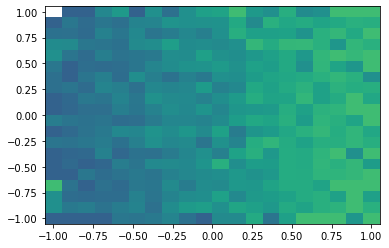

In [2]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = plt.axes()

X,Y = np.meshgrid(cells_x,cells_x)
        
plot = ax.pcolormesh(Y,X,all_cell_colours[:,:,0])
def update(frame):
    plot.set_array(all_cell_colours[:,:,frame])
    return plot,

ani = FuncAnimation(fig, update, frames=[0,0,0,0,0,*range(all_cell_colours.shape[0])], blit=True)
ani.save('diffusion_colourmap_mixing.gif')

[1. 1. 1. ... 1. 0. 0.]


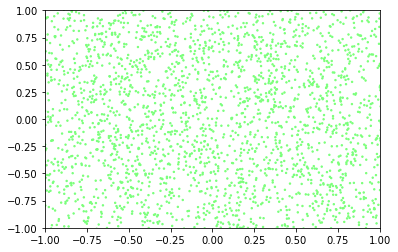

In [3]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


fig = plt.figure()
ax = plt.axes(xlim=(-1, 1),ylim=(-1,1))
print(particles_array[0,:,2])
scatter = ax.scatter(particles_array[0,:,0], particles_array[0,:,1],s=2,c =plt.cm.jet(particles_array[0,:,2]))
def update(frame):
    scatter.set_offsets(particles_array[frame,:,0:2])
    scatter.set_color(plt.cm.jet(particles_array[frame,:,2]))
    return scatter,

ani = FuncAnimation(fig, update, frames=range(1,particles_array.shape[0]), blit=True)
ani.save('diffusing_particles_mixing.gif')